In [1]:
import numpy as np


class PCA:
    def __init__(self, n_components: int):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean

        # Covariance matrix
        cov = np.cov(X_centered, rowvar=False)

        # Eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # Sort eigenvectors by decreasing eigenvalues
        sorted_idx = np.argsort(eigenvalues)[::-1]
        eigenvectors = eigenvectors[:, sorted_idx]
        eigenvalues = eigenvalues[sorted_idx]

        # Select the top n_components
        self.components = eigenvectors[:, :self.n_components]

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


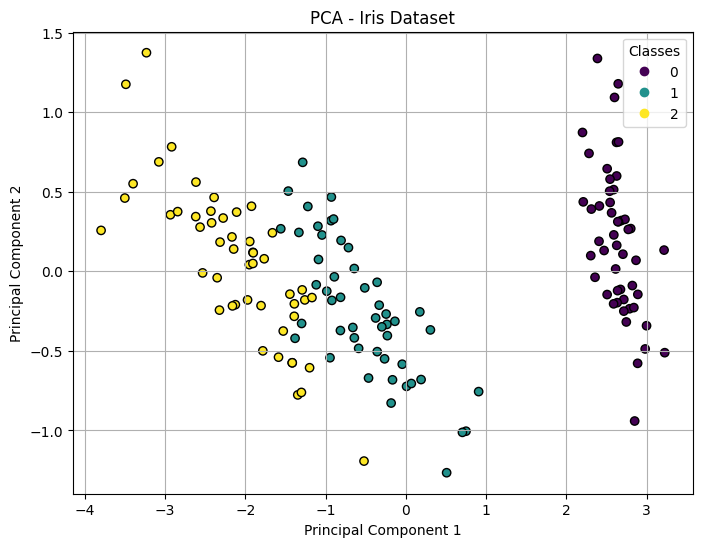

In [2]:
if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from sklearn.datasets import load_iris

    # Load dataset
    data = load_iris()
    X = data.data
    y = data.target

    # PCA
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    # Plotting the reduced data
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', edgecolor='k')
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title("PCA - Iris Dataset")
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.grid(True)
    plt.show()
